In [5]:
import heartpy as hp
import matplotlib.pyplot as plt
import scipy
import csv

In [6]:
# 피험자를 선택하여 데이터 불러오는 함수
def select_subject(_subject):
    path = 'C:\Users\user\Downloads\iDAQ-400\Software\iDAQ400\Data\ASCII_data\\' + subject
#     print(path)
    _listOfData= [path+'\\' +_subject + '_ref.txt',
                  path+'\\' +_subject + '_calm.txt',
                  path+'\\' +_subject + '_horror.txt',
                  path+'\\' +_subject + '_happy.txt',
                  path+'\\' +_subject + '_sad.txt']
    
    return _listOfData

In [7]:
#peak찾는 함수
#point=scipy.signal.find_peaks(hrdata,prominance=0.3)
import scipy
def detect_peak(hrdata):
    point=scipy.signal.find_peaks(hrdata,distance=200)
#     print(point[0])
    plt.scatter(point[0],hrdata[point[0]])
    plt.plot(hrdata)
    return(point[0])
# peak=detect_peak(hrdata)
# print(peak)


In [10]:
#주기찾는 함수 
def find_period(peaks):
    period=[]
    for i in range(len(point[0])-1):
        period.append(point[0][i+1]-point[0][i])
#     print('period:',period)
    return(period)
# period=find_period(peak)
# print(period)

In [11]:
# 평균 ppi 구하는 함수
def calculate_PPI(peaks):
    PPI=0.0;
    for i in range(len(peaks)):
        PPI +=peaks[i]
    PPI /= len(peaks)
    return PPI

In [12]:
# 평균 amplitude 구하는 함수
def calculate_Amplitude(hrdata, peaks):
    amplitude=0.0;
    for i in range(len(peaks)):
        amplitude +=hrdata[peaks[i]]
    amplitude /= len(peaks)
    return amplitude

In [13]:
# 레퍼런스 대비 변화율 계산하는 함수
def calculate_ChangeRate(ref,x):
    changeRate = ((x-ref)/ref)*100
    return changeRate

In [14]:
# 변화율 csv로 출력하는 함수
def write_csv(_subject, list_amp,list_ppi):
    f = open(_subject + '_output.csv', 'w', encoding='utf-8')
    wr = csv.writer(f)
    for i in range(len(list_amp)):
        wr.writerow([i+1, str(i+1) +"감성", str(list_amp), str(list_ppi), True])
    f.close()

5
[0번째]

amplitude: -66.23583819002988

ppi : 5.7808783977022475

[1번째]

amplitude: -28.390532262971917

ppi : 23.893980457680264

[2번째]

amplitude: -57.473823534892844

ppi : -13.915367064237058

[3번째]

amplitude: -46.23093776795063

ppi : 58.48783598761953



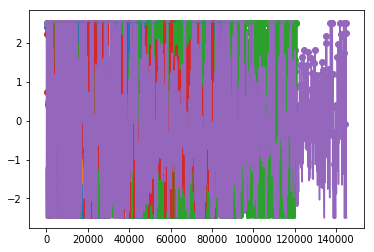

In [15]:
#데이터 불러오기
subject='knh'
listOfData = select_subject(subject)

# 레퍼런스 및 영상별 평균 amplitude, ppi 계산
# 0=ref, 1=평온, 2=공포, 3=기쁨, 4=슬픔
hrList=[0 for i in range(5)]
hrpeaks=[[None] for row in range(5)]  # peak 인덱스
amplitudes=[0 for i in range(5)]
PPIs=[0 for i in range(5)]
changeRates_amp=[0 for i in range(4)]
changeRates_ppi=[0 for i in range(4)]

print(len(listOfData))
for i in range(5):
    hrList[i] = hp.get_data(listOfData[i])
    hrpeaks[i] = detect_peak(hrList[i])  
    amplitudes[i]=calculate_Amplitude(hrList[i], hrpeaks[i])
    PPIs[i]=calculate_PPI(hrpeaks[i])
    

# 영상별 레퍼런스 대비 변화율 계산
for i in range(5):
    # ref
    if i==0:
        ref_amplitude = amplitudes[i]
        ref_PPI = PPIs[i]
    else:
        changeRates_amp[i-1]=calculate_ChangeRate(ref_amplitude, amplitudes[i])
        changeRates_ppi[i-1]=calculate_ChangeRate(ref_PPI, PPIs[i])

# 변화율 출력
for i in range(len(changeRates_amp)):
    print('[' + str(i) + '번째]\n' )
    print("amplitude: "+ str(changeRates_amp[i]) + '\n')
    print("ppi : "+ str(changeRates_ppi[i]) + '\n')
    
# 변화율 csv 출력
write_csv
